# Exercise 3 - Code

In [2]:
import networkx as nx
import numpy as np
import random as rd
from matplotlib import pyplot as plt
plt.style.use("seaborn-notebook")

## Problem 1

*a) Write a dice function that returns numbers 1, ..., 6 with equal probability when it is called. Throw the dice 1000, 10000 and 100000 times and store the results in a list. Compare the results by drawing a barplot showing the frequencies for the results with errorbars.*

In [86]:
def die():
    r = 6 * rd.random() # in [0,6)
    return int(np.ceil(r))

def throw(n, die=die):
    throws = [die() for _ in range(n)]
    count, _ = np.histogram(throws, bins=6)
    return count

eyes = np.arange(1,7)
Ns = 10**np.arange(3,6)
n = len(Ns)

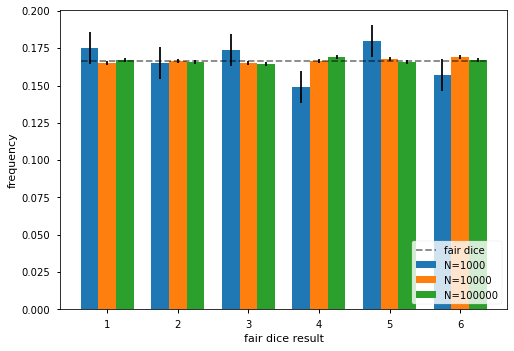

In [87]:
fig, ax = plt.subplots()

for i, N in enumerate(Ns):
    freqs = throw(N) / N
    std = np.std(freqs)
    plt.bar(eyes+(i-(n-1)/2)/(n+1), freqs, 1/(n+1), yerr=std, label=f"N={N}")

plt.hlines(1/6, 1-n/(n+1)/2, 6+n/(n+1)/2, color="black", alpha=0.5, linestyles="dashed", label="fair dice")
plt.legend(loc="lower right")
plt.xlabel("fair dice result")
plt.ylabel("frequency")
plt.show()

*b) Write a biased dice function with an increased propability of 10% to get a 6. Repeat the experiment from above.*

In [43]:
def biased_die():
    if rd.random() <= 0.1:
        return 6
    else:
        return die()

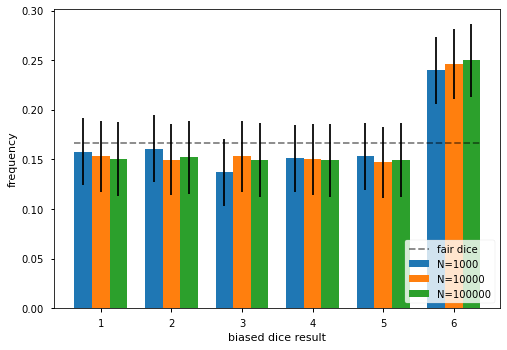

In [89]:
fig, ax = plt.subplots()

for i, N in enumerate(Ns):
    freqs = throw(N, die=biased_die) / N
    std = np.std(freqs)
    plt.bar(eyes+(i-(n-1)/2)/(n+1), freqs, 1/(n+1), yerr=std, label=f"N={N}")
    
plt.hlines(1/6, 1-n/(n+1)/2, 6+n/(n+1)/2, color="black", alpha=0.5, linestyles="dashed", label="fair dice")
plt.legend(loc="lower right")
plt.xlabel("biased dice result")
plt.ylabel("frequency")
plt.show()

*c) Find the number of trials which would give you a certain confidence about the dice being biased.*

With the plot below we can see that around $N = 4000$ the error for 6 eyes starts to stay consistently above the threshold of the mean + standard deviation.

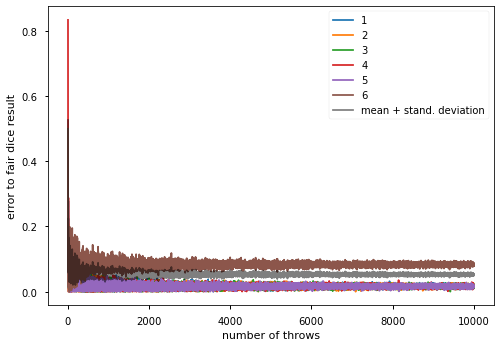

In [258]:
Ns = np.arange(1, 10_000)
errors = np.array([np.abs(throw(N, die=biased_die)/N - 1/6) for N in Ns])
thresholds = np.mean(errors, axis=1) + np.std(errors, axis=1)
plt.plot(Ns, errors, label=np.arange(1,7))
plt.plot(Ns, thresholds, color="k", alpha=0.5, label="mean + stand. deviation")
plt.xlabel("number of throws")
plt.ylabel("error to fair dice result")
plt.legend()
plt.show()

## Problem 2

*Consider a Gilbert random graph with 500 nodes and iterate over the connection probability $p.$*

*a) Find a meanigful range for $p$ and measure the number of connected components, the size of the largest connected component, the average degree and the average shortest path length (spl).*

In [122]:
def info(N, ps):
    n = len(ps)
    nccs = np.zeros(n)
    sizes = np.zeros(n)
    degs = np.zeros(n)
    spls = np.zeros(n)

    for i, p in enumerate(ps):
        G = nx.erdos_renyi_graph(N, p)
        nccs[i] = nx.number_connected_components(G)
        sizes[i] = len(max(nx.connected_components(G), key=len))
        degs[i] = np.mean(list(dict(G.degree()).values()))
        try:
            spls[i] = nx.average_shortest_path_length(G)
        except nx.NetworkXError:
            # if graph is not connected return infinity
            spls[i] = np.Inf

    return nccs, sizes, degs, spls

N = 500
ps = 10.**np.linspace(-5, 0, 101)

nccs, sizes, degs, spls = info(N, ps)

i_crit = np.argmin(degs <= 1)
p_crit = (ps[i_crit] + ps[i_crit-1]) / 2

i_conn = np.argmin(degs <= np.log(N))
p_conn = (ps[i_conn] + ps[i_conn-1]) / 2

print("critical probability:", p_crit)
print("probability at start of connected regime:", p_conn)

*b) Plot all measured quatities over $p$ so that the different regimes become apparent.*

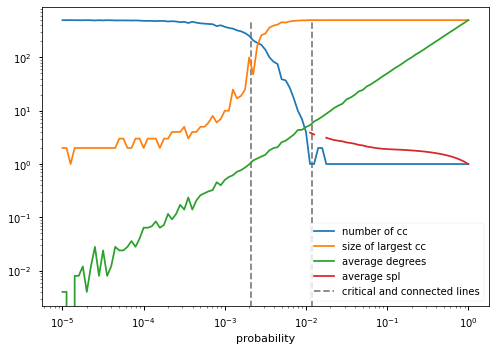

In [124]:
plt.loglog(ps, nccs, label="number of cc")
plt.loglog(ps, sizes, label="size of largest cc")
plt.loglog(ps, degs, label="average degrees")
plt.loglog(ps, spls, label="average spl")
plt.vlines([p_crit, p_conn], 0, N, colors="grey", linestyles="dashed", label="critical and connected lines")
plt.xlabel("probability")
plt.legend()
plt.show()

*c) Plot the the largest connected component and the average spl over the average degree.*


C:\Users\maxst\AppData\Local\Temp/ipykernel_11324/1882780832.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(ps, sizes / degs, label="lcc over average degree")


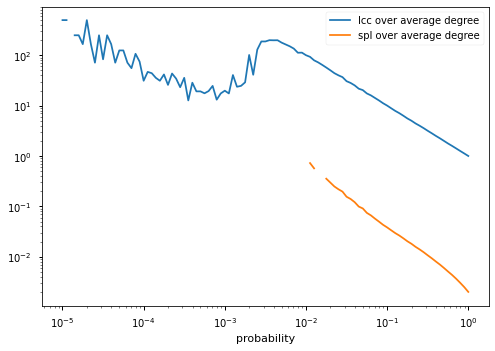

In [128]:
plt.loglog(ps, sizes / degs, label="lcc over average degree")
plt.loglog(ps, spls / degs, label="spl over average degree")
plt.xlabel("probability")
plt.legend()
plt.show()

## Problem 3

*Compare the random graph with a regular lattice.*

*a) Generate a 2d lattice as a network and make a spring layout.*

In [142]:
n = 16
m = 9
G = nx.grid_2d_graph(n, m)
pos100 = nx.spring_layout(G, iterations=100)
pos1000 = nx.spring_layout(G, iterations=1000)

*b) Draw the network, try using more iteration steps.*

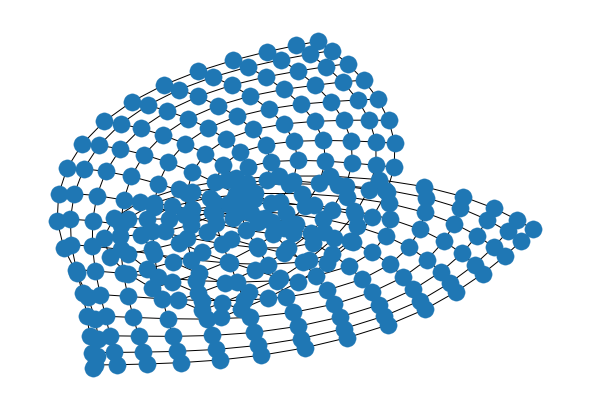

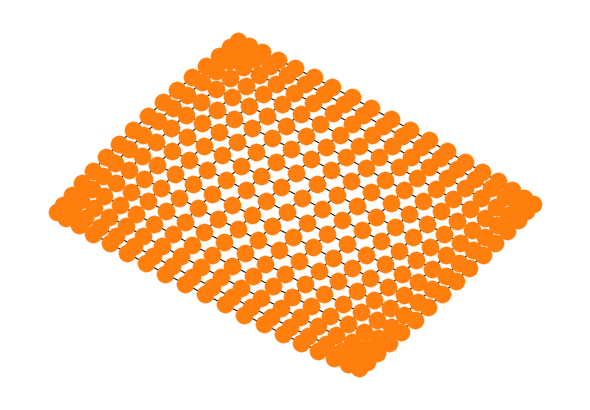

In [143]:
nx.draw(G, pos=pos100, node_color="C0")
plt.show()
nx.draw(G, pos=pos1000, node_color="C1")
plt.show()

*c) Iterate over a meaningful range of network sizes and measure the average spl for both, the random graph and the lattice graph and plot both in one figure.*

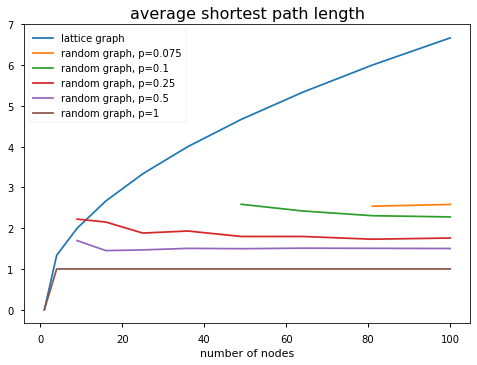

In [168]:
ps = [0.075, 0.1, 0.25, 0.5, 1]
Ns = np.arange(1,11)**2

n = len(Ns)
m = len(ps)
spl_LG = np.zeros(n)
spl_RG = np.zeros((n, m))

for i, N in enumerate(Ns):
    M = int(np.sqrt(N))
    LG = nx.grid_2d_graph(M, M)
    try:
        spl_LG[i] = nx.average_shortest_path_length(LG)
    except nx.NetworkXError:
        spl_LG[i] = np.Inf

    for j, p in enumerate(ps):
        RG = nx.erdos_renyi_graph(N, p)
        try:
            spl_RG[i,j] = nx.average_shortest_path_length(RG)
        except nx.NetworkXError:
            spl_RG[i,j] = np.Inf

plt.plot(Ns, spl_LG, label="lattice graph")
for j in range(m):
    plt.plot(Ns, spl_RG[:,j], label=f"random graph, p={ps[j]}")
plt.xlabel("number of nodes")
plt.title("average shortest path length", fontsize=16)
plt.legend()
plt.show()